# The Significance of Counting Words in Literary Analysis

This will serve as a place where I can import everything I need:

In [3]:
from string import punctuation
from collections import Counter
import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])
import os
from urllib.request import urlopen
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Frankenstein!

Getting the Frankenstein text in this notebook, and creating a variable to open it and decode it:

In [41]:
Frank = urlopen('https://www.gutenberg.org/cache/epub/84/pg84.txt')
Frank = str(Frank.read().decode('utf8'))


In [9]:
print(stopwords.words('english'))
print(punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Creating code to clean up the text

In [10]:
def clean_text(text):
    text = text.lower()
    for char in punctuation:
        text = text.replace(char," ")
        
    tokens = text.split()
        
    text_nostop = []
    for x in tokens:
        if x not in stopwords.words('english'):
            text_nostop.append(x)
            
    text = " ".join(text_nostop)
    doc = nlp(text)
    return [token.lemma_ for token in doc]

Opening up the Frankenstein text without stopwords and lemmatized:

In [35]:
clean_text(Frank)

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'frankenstein',
 'modern',
 'prometheus',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'part',
 'world',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use',
 'term',
 'project',
 'gutenberg',
 'license',
 'include',
 'ebook',
 'online',
 'www',
 'gutenberg',
 'org',
 'locate',
 'united',
 'states',
 'check',
 'law',
 'country',
 'locate',
 'use',
 'ebook',
 'title',
 'frankenstein',
 'modern',
 'prometheus',
 'author',
 'mary',
 'wollstonecraft',
 'shelley',
 'release',
 'date',
 'october',
 '1',
 '1993',
 'ebook',
 '84',
 'recently',
 'update',
 'december',
 '2',
 '2022',
 'language',
 'english',
 'credit',
 'judith',
 'boss',
 'christy',
 'phillips',
 'lynn',
 'hanninen',
 'david',
 'meltzer',
 'html',
 'version',
 'al',
 'haine',
 'corrections',
 'menno',
 'de',
 'leeuw',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'frankenstein',
 'modern',
 'prometheus',
 'frankenste

Counting 30 most common words:

In [43]:
Frankenstein = clean_text(Frank)
freq = Counter(Frankenstein)
freq.most_common(30)

[('"', 791),
 ('one', 209),
 ('could', 198),
 ('would', 184),
 ('man', 181),
 ('see', 166),
 ('yet', 152),
 ('feel', 141),
 ('father', 134),
 ('day', 133),
 ('say', 130),
 ('upon', 128),
 ('work', 127),
 ('friend', 125),
 ('eye', 123),
 ('—', 122),
 ('life', 120),
 ('find', 120),
 ('may', 114),
 ('make', 113),
 ('every', 109),
 ('first', 108),
 ('time', 108),
 ('might', 108),
 ('shall', 107),
 ('place', 104),
 ('know', 104),
 ('great', 101),
 ('take', 101),
 ('night', 98)]

For some reason, some punctuation was not removed. This is probably due to an error in the code, but I am going to work with it (this will become clear below).

For fun, I am creating a word cloud visualization for the Frankenstein.

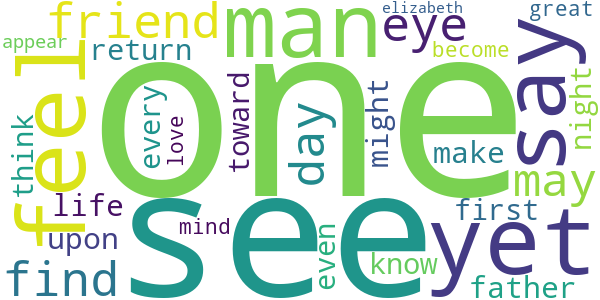

In [47]:
wordcloudFrank = ' '.join(Frankenstein)
cloud = WordCloud(background_color = "white", 
                  max_words = 30, 
                  contour_width = 5, 
                  width = 600, height = 300, 
                  random_state = 4)

# Process the word cloud
cloud.generate(wordcloudFrank)

# Visualize!
cloud.to_image()

### Analyzing the Frankenstein word-count

   So, is counting words enough for understanding Frankenstein if I am already aware of the text? Or do we need to implement other digital techniques like topic modeling and neural networks to actually gain something from it? The answer to this question, I think, depends on how you approach literary analysis. 
    On the one hand, these words may not be too significant. The number one "word" is actually just a set of quotation marks - which is probably due to some faulty code on my end - so I will move to the second word: "one". In the context of the story, "one" can have different meanings; it can refer to a number or be a neutral pronoun used for an individual (for example, "one must eat to survive."). "One," I think, evokes a sense of solitude and I think sumplements the lonliness in the story itself, both on the part of Dr. Frankenstein, the scientist who attempts to create his own being, and his creation, who is abandoned by his creator and is unable to find love or affection. 
    It is interesting that in a story based around scientific endeavor, upon amazing "progress," the only word that gets at that progress for me is "great," which sits in the top right corner of the word cloud. Instead, words like "man," "friend," "feel," "see", "yet" appear more frequently. The story of Frankenstein is not about greatness, not about the inhuman, but about humanity itself: about friends, feeling, experiencing, wishing. 
    Before moving onto the next story I will be counting, I do want to come back to the quotation marks. Although initially a mistake, I kept them because they do point to the fact that most of the story is in dialogue; it is not a series of live events but is instead told to us through letters, through memory, through conversation. 
    I do think that word counts can supplement the process of literary analysis. It is especially cool to see the most common words in the story with knowledge of the story itself, because it does in fact make sense that these words are most common. This word cloud offers a creative new way to approach Frankenstein.
    

## Plague Ship by Andre Norton

For this next part of the project, I am using a novel that I do not know. This is a novel under the same genre in Project Gutenberg -- science fiction written by women -- but I have never heard of it. It has 198 downloads, and was released in 2005. Let's see what I can figure out just from using the word count!

In [5]:
Plague = urlopen('https://www.gutenberg.org/cache/epub/16921/pg16921.txt')
Plague = str(Plague.read().decode('utf8'))

Let's open up the text.

In [8]:
print(Plague)

﻿The Project Gutenberg eBook of Plague Ship
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Plague Ship

Author: Andre Norton

Release date: October 23, 2005 [eBook #16921]
                Most recently updated: December 12, 2020

Language: English

Credits: Produced by Jason Isbell, Greg Weeks, Cori Samuel and the
        Online Distributed Proofreading Team at https://www.pgdp.net


*** START OF THE PROJECT GUTENBERG EBOOK PLAGUE SHIP ***




Produced by Jason Isbell, Greg Weeks, Cori Samuel and the
Online Distributed Proofreading Team at https://www.pgdp.net





ANDRE NORTON

(Writ

I am going to use the same function I wrote earlier to take out punctuation, tokenize, and lemmatize.

In [11]:
clean_text(Plague)

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'plague',
 'ship',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'part',
 'world',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use',
 'term',
 'project',
 'gutenberg',
 'license',
 'include',
 'ebook',
 'online',
 'www',
 'gutenberg',
 'org',
 'locate',
 'united',
 'states',
 'check',
 'law',
 'country',
 'locate',
 'use',
 'ebook',
 'title',
 'plague',
 'ship',
 'author',
 'andre',
 'norton',
 'release',
 'date',
 'october',
 '23',
 '2005',
 'ebook',
 '16921',
 'recently',
 'update',
 'december',
 '12',
 '2020',
 'language',
 'english',
 'credit',
 'produce',
 'jason',
 'isbell',
 'greg',
 'week',
 'cori',
 'samuel',
 'online',
 'distribute',
 'proofread',
 'team',
 'https',
 'www',
 'pgdp',
 'net',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'plague',
 'ship',
 'produce',
 'jason',
 'isbell',
 'greg',
 'week',
 'cori',
 'samuel',
 'online',
 'distribute',
 'proofread',

In [12]:
Plague_Ship = clean_text(Plague)
type(Plague_Ship)

list

Let's count the 30 most common words in this text!

In [14]:
freq2 = Counter(Plague_Ship)
freq2.most_common(30)

[('dane', 534),
 ('rip', 244),
 ('one', 223),
 ('would', 202),
 ('could', 201),
 ('ali', 182),
 ('go', 174),
 ('make', 166),
 ('man', 157),
 ('queen', 148),
 ('come', 145),
 ('van', 144),
 ('see', 141),
 ('take', 140),
 ('know', 136),
 ('get', 134),
 ('time', 133),
 ('ship', 126),
 ('hand', 125),
 ('back', 124),
 ('work', 116),
 ('rycke', 115),
 ('give', 107),
 ('jellico', 105),
 ('salariki', 103),
 ('week', 101),
 ('gutenberg', 97),
 ('right', 93),
 ('well', 91),
 ('two', 91)]

Interesting. Let's create a word cloud now.

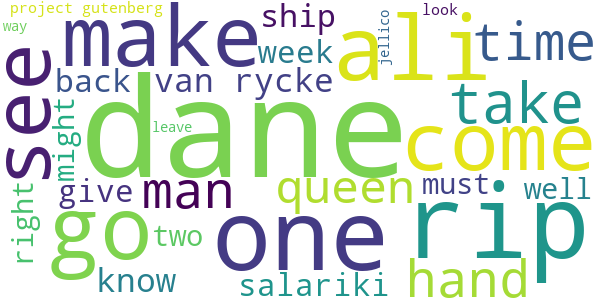

In [15]:
wordcloudPlague = ' '.join(Plague_Ship)
cloud = WordCloud(background_color = "white", 
                  max_words = 30, 
                  contour_width = 5, 
                  width = 600, height = 300, 
                  random_state = 4)

# Process the word cloud
cloud.generate(wordcloudPlague)

# Visualize!
cloud.to_image()

### Trying to make sense of the Plague Ship word count

I'm a bit stuck on this one. From the word count alone, I am going to make some assumptions about the text. First, I am guessing that this story takes place in Denmark given that "dane" is the most common word in the text. Similar to Frankenstein, the nonhuman takes up little space in the text. "Ship" appears semi-frequently, but it is the only reference to setting that appears in the word cloud (other than "dane"). I'm going to assume that while this story perhaps takes place on a ship related to Denmark, the setting itself is less important in the story than the interactions between characters. Words like "go," "make," "man," and "time" appear frequently, which to me are words related to actions that humans take and ways of being in the world. This story is not a world-building story like Lord of the Rings. The details in the story are a bit unclear. While the story is called Plague Ship, there is no reference to disease, which perhaps points to the possibility that the "disease" aspect of the story is explained using words that do not relate to diseases. This is interesting; I wonder how much disease can play a role when it is not referenced that often! Maybe the author establishes disease at the beginning of the story and doesn't really have to talk about it again -- the "disease" aspect might just exist in the readers' imaginations and not necessarily in tangible words on the page. 

## Let's compare my analysis with information from the Wikipedia page on the novel.

I am going to import the necessary tools to scrape the website.

In [26]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

# printing the source text from the page.
r = requests.get('https://en.wikipedia.org/wiki/Plague_Ship')
source = r.text
source

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Plague Ship - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featur

Now, I am going convert to a BeautifulSoup object to make it easier to just print the text I want.

In [28]:
soup = BeautifulSoup(source, 'html5')
print("Here is the source text from the body of the page:")
print(soup.find_all('p'))

body = soup.find(id="mw-content-text")
print("\n")
print("Here is a cleaner version of that:")
for t in body.find_all("p"):
    print(t.text)

Here is the source text from the body of the page:
[<p><i><b>Plague Ship</b></i> is a <a href="/wiki/Science_fiction" title="Science fiction">science fiction</a> novel by  <a href="/wiki/Andre_Norton" title="Andre Norton">Andre Norton</a> under the pseudonym Andrew North. It was published in <a href="/wiki/1956_in_literature" title="1956 in literature">1956</a> by <a href="/wiki/Gnome_Press" title="Gnome Press">Gnome Press</a> in an edition of 5,000 copies. The book is the second volume of the author's <a class="mw-redirect" href="/wiki/Bibliography_of_Andre_Norton#Solar_Queen" title="Bibliography of Andre Norton">Solar Queen</a> series.
</p>, <p>The main protagonist of the novel is Dane Thorson, Cargo-master-apprentice on the Free Trader rocket ship the Solar Queen. Free Traders take on trading contracts on remote and recently discovered planets, which can be dangerous and unpredictable.
</p>, <p>The Solar Queen has recently obtained a valuable trading contract on the planet Sargol an

Wow! This is not what I was expecting at all. I had no idea that this was the second book in a series, nor did I realize that the story took place on a spaceship! I thought that it took place on a ship in the ocean.I also find it funny that "dane" is not refering to Denmark but to the main character of the book. Now that I know what the story is about, some of the words in the word cloud make more sense. "Come" and "go" could be referencing the trade aspect of the story and the movement of the ship. "Queen" and "salariki" are obviously referencing the Solar Queen and the Salariki cat-people. It also makes sense that "disease"-related words are not common, as it seems like the story does not depend heavily upon the specifics of the disease. The disease or plague on the ship, which are caused by the pests, functions more as a mechanism to explore the social and political aspects of the relationship betwen the traders and the space government. This is interesting to me because it points to the way that the presence or absence of certain words drives the story. This is a story about politics, about intergalactic capitalism, and yet this is not very clear from the word-counts. It seems as if the combination of certain words and not necessarily the frequency of them matters more for producing stories. Maybe "politics" is not its own thing but is rather an imaginary produced by the combination of words like "make," "come," "must," "right," and "know." 

## What can we make of this experiment?

I think that this experiment reveals what is probably already commonly known in the digital humanities: that word count is not enough to teach us about stories or discourses. This is why other digital techniques exist -- techniques like topic modeling, making use of n-grams, and networking. In the Frankenstein analysis, the word-counts did allow for a rather creative and exciting process of connecting the high-frequency words to my already-existing understanding of the story. In this case, counting words can play a role in literary analysis! However, for making sense of texts that are unknown to me, they were not very revealing. I was kind of in the dark the whole time, and I got major aspects of the story wrong.

Despite word-counts not helping much for understanding texts that we have not read, I think they point us towards an interesting question of meaning-making. Making meaning is not necessarily a process of using the same words over and over again, but is rather about combining words. To understand a text is not to take in each word separately, but is to take in words together while reading over time. There is an element of time here as well as an element of relationality. This experiment supports a common idea in literary and social theory: that words do not necessarily reference things that exist outside of language, but rather only reference other words! It's words all the way down, stacked on top of each other. To use an example from Plague Ship, politics, capitalism, and trade are not necessarily solid "things" that exist outside of language, but are rather conglomerates of other words! This is the only way that a book so focused on trade and politics can convey those ideas without actually referencing the words "trade" and "politics" so frequently. Interesting!